In [1]:
import json
import pandas as pd

import matplotlib.pyplot as plt
import mplfinance as mpf
import FEAutils as hlp

from IPython.display import JSON

In [2]:
with open('../data/ets_mkt.json', 'r') as fp:
    ets_mkt = json.load(fp)
    
JSON(ets_mkt)

<IPython.core.display.JSON object>

In [3]:
df_ets = pd.DataFrame(ets_mkt)

df_ets['datetime'] = pd.to_datetime(df_ets['datetime'])
df_ets = df_ets.set_index('datetime')

df_ets.head()

,open,high,low,settle,change,wave,volume,prev_day_open_interest,efp_volume,efs_volume,block_volume,close
datetime,,,,,,,,,,,,
2021-04-16,44.53,44.53,44.53,44.33,0.25,44.53,1.0,2483.0,NaN,NaN,NaN,44.78
2021-04-15,43.84,44.32,43.84,44.08,0.35,44.22,5.0,2881.0,NaN,NaN,598.0,44.19
2021-04-14,43.87,43.88,43.47,43.73,-0.03,43.75,28.0,4865.0,NaN,NaN,2290.0,43.84
2021-04-13,44.34,44.41,43.94,43.76,-0.63,44.21,5.0,5113.0,NaN,NaN,250.0,43.71
2021-04-12,43.80,44.50,43.80,44.39,0.83,44.13,11.0,5711.0,NaN,NaN,600.0,44.63


(<Figure size 2000x2000 with 2 Axes>,
 array([<AxesSubplot:ylabel='Price (EUR/tonne CO2)'>,
        <AxesSubplot:ylabel='Volume (tonne CO2)'>], dtype=object))

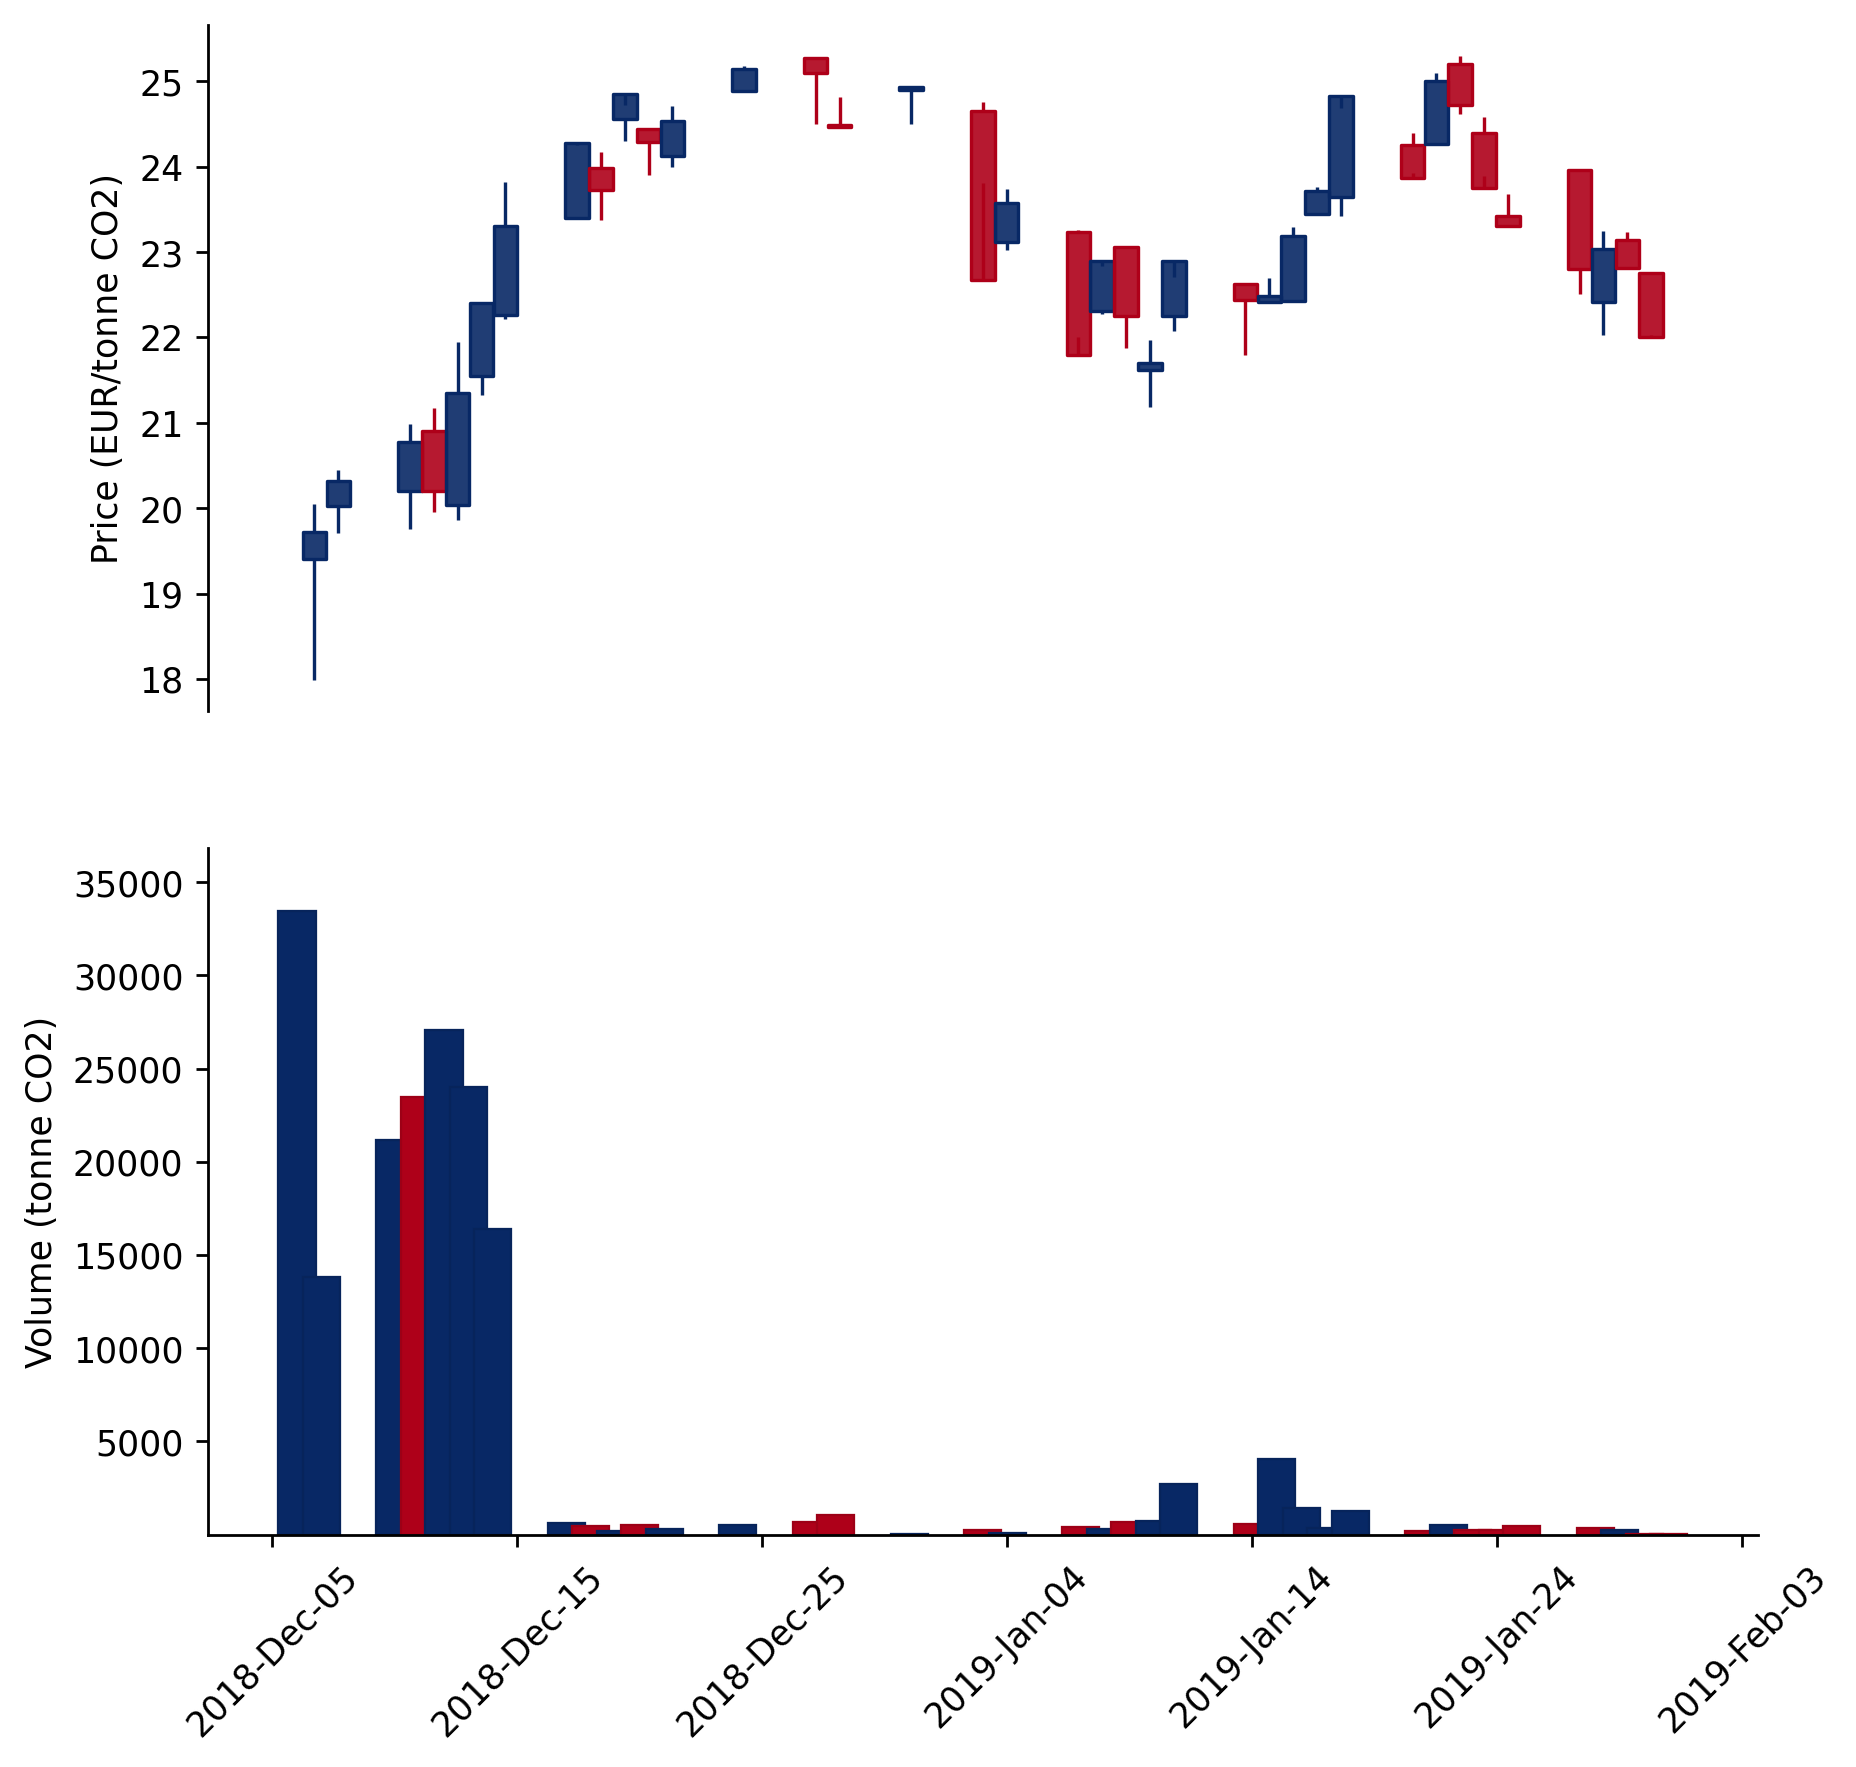

In [4]:
def plot_ohlc_vol(df):
    fig, axs = plt.subplots(dpi=250, nrows=2, figsize=(8, 8))

    mpf.plot(df, type='candle', ax=axs[0], volume=axs[1], show_nontrading=True, style='sas')

    ax = axs[0]
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_ylabel('Price (EUR/tonne CO2)')
    ax.yaxis.set_label_position('left')
    ax.yaxis.tick_left()
    hlp.hide_spines(ax, positions=['top', 'bottom', 'right'])

    ax = axs[1]
    ax.set_ylabel('Volume (tonne CO2)')
    hlp.hide_spines(ax, positions=['top', 'right'])
    
    return fig, axs

latest_date = pd.to_datetime('2019-01-31')
earliest_date = latest_date - pd.Timedelta(weeks=8)

cols = ['open', 'high', 'low', 'close', 'volume']
df_8wks_ets = df_ets[cols].sort_index().dropna().loc[earliest_date:latest_date]

plot_ohlc_vol(df_8wks_ets)

Text(0, 0.5, 'Average Daily Volume (tonne CO2)')

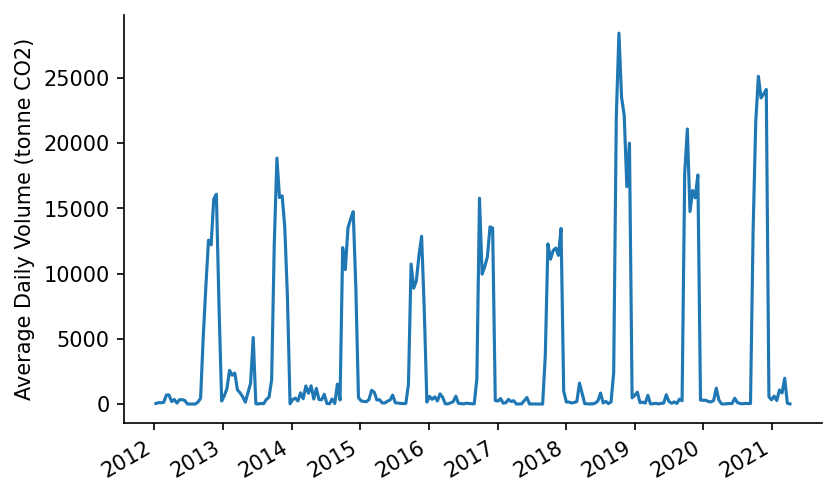

In [5]:
fig, ax = plt.subplots(dpi=150)

df_ets['volume'].resample('14D').mean().dropna()['2012':].plot(ax=ax)

hlp.hide_spines(ax)
ax.set_xlabel('')
ax.set_ylabel('Average Daily Volume (tonne CO2)')

Text(0, 0.5, 'Average Daily Volume (tonne CO2)')

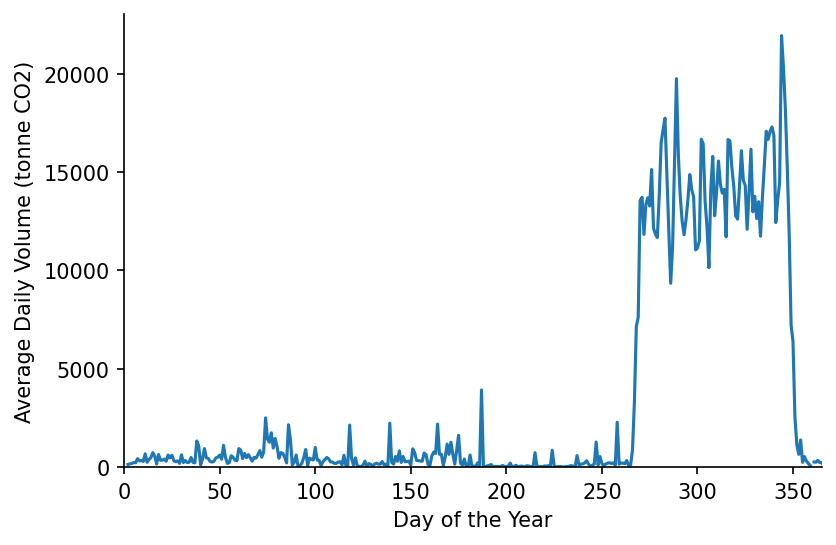

In [6]:
fig, ax = plt.subplots(dpi=150)

df_ets['volume'].groupby(df_ets.index.dayofyear).mean().plot()

hlp.hide_spines(ax)
ax.set_xlim(0, 365)
ax.set_ylim(0)
ax.set_xlabel('Day of the Year')
ax.set_ylabel('Average Daily Volume (tonne CO2)')